<a href="https://colab.research.google.com/github/minsuking/LeetCode_Practice/blob/master/LeetCode_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Start: SEP. 29. 2021 


*   Time : PDT 7:00 pm

*   Zoom :  https://ucdavis.zoom.us/j/4611628062?pwd=cVIxRnp6Zkxhc1pEWEw3d3BaYXJOdz09

*   Reference resources : 

https://www.1point3acres.com/bbs/forum.php?mod=guide&view=hot&mobile=2

https://blog.csdn.net/fuxuemingzhu/article/details/82960833

https://blog.csdn.net/fuxuemingzhu/article/details/80826333

https://interviewing.io/recordings

##**OCT. 10. 2021**

Max Consecutive Ones (LeetCode #485)

https://leetcode.com/problems/max-consecutive-ones/

In [ ]:
# Mins' Code

from typing import List 

class Solution:
    def findMaxConsecutiveOnes(self, nums: List[int]) -> int:
        str_nums = list(map(str, nums))
        sum_str = ''.join(str_nums)
        spl_zero = sum_str.split('0')
        count_one = list(map(len, spl_zero))
        return max(count_one)

In [ ]:
# Leo's Code 
class Solution:
    def findMaxConsecutiveOnes(self, nums: List[int]) -> int:
        ans = 0 
        curr_max = 0 
        for i in nums:
            if i == 1:
                curr_max += 1 
                
            #if i == 0     
            else:
                ans = max ( ans, curr_max )
                curr_max = 0
        ans = max(ans, curr_max)
        return ans


        [1,1,0,0,1,1,1,1,1,1]
            


In [ ]:
# Joe's Code
class Solution:
    def findMaxConsecutiveOnes(self, nums: List[int]) -> int:
        res = 0
        cnt = 0
        for n in nums:
            if n == 0:
                cnt = 0
                continue
            cnt += 1
            res = max(cnt, res)
        return res
        

##**OCT. 11. 2021**

Amazon OA Q : Sum of Subarray Minimums 

https://leetcode.com/problems/sum-of-subarray-minimums/




In [ ]:
# Leo's Code
from typing import List 
class LeetCode907Solution:
    def sumSubarrayMins(self, arr: List[int]) -> int:
        mod = 10**9 + 7
        stack = [-1] 
        arr.append(-1) 
        # or new_arr = arr.copy() then new_arr.append(-1)
        ans = 0 
        
        for i in range(len(arr)):
            while arr[i] < arr[stack[-1]]:
                curr_idx = stack.pop()
                ans += arr[curr_idx]*(i-curr_idx)*(curr_idx-stack[-1])
            stack.append(i)
            
        return ans % mod

In [ ]:
# Joe's code
# Time out
class Solution:
    def sumSubarrayMins(self, arr: List[int]) -> int:
        res = 0
        for i in range(len(arr)):
            cur = 0
            while cur + i < len(arr):
                res += min(arr[cur:cur+i+1])
                cur += 1
        return res

In [ ]:
# Minsu's Code
# Java
import java.util.*;

class Solution {
    static int MOD = 1000000007;
    public int sumSubarrayMins(int[] arr) {
        List<Long> res = new ArrayList<>();
        List<Integer> pos = new ArrayList<>();
        
        for(int i=0;i<arr.length;i++){
            long var = arr[i];
            while(!pos.isEmpty() && arr[pos.get(pos.size()-1)] >= var){
                pos.remove(pos.size()-1);
            }
            if(!pos.isEmpty()){
                int minPos = pos.get(pos.size()-1);
                res.add(res.get(minPos) + var * (i - minPos));
            }else{
                res.add(var * (i+1));
            }
            pos.add(i);
        }
        return (int)(res.stream().mapToLong(i -> i).sum() % MOD);

    }
}
# Python
class Solution:
     def sumSubarrayMins(self, arr: List[int]) -> int:
        mod = 1000000007
        res, pos = [], []
        for i, var in enumerate(arr): 
            while pos and arr[pos[-1]] >= var:
                    del pos[-1]
            if pos:
                minPos = pos[-1]
                res.append(res[minPos] + var * (i-minPos))
            else: 
              res.append(var * (i+1))
            pos.append(i)
        return sum(res) % mod 

# OCT. 12. 2021
Group Anagrams (LC #49)
https://leetcode.com/problems/group-anagrams/


In [ ]:
#Leo's Code 
from collections import defaultdict

class Solution:
    def groupAnagrams(self, strs: List[str]) -> List[List[str]]:
        
                  #a b c d e f ... z 
        groups = [ 1 0 2 0 0 0 0 0 ]. 

        

        groups = defaultdict(list)
        
        for s in strs: 
            counter = [0]*26  # lower case chars 
            
            #counting up 
            for c in s:
                counter[ord(c) - ord("a")] += 1 
            
            #put it do the groupList 
            groups[tuple(counter)].append(s) 
            
        
        return list(groups.values())

SyntaxError: ignored

In [ ]:
# Joe's Code
# time O(N*M) N=len(strs), M=max_length(input), space O(N)
from collections import defaultdict

class Solution:
    def groupAnagrams(self, strs: List[str]) -> List[List[str]]:
        ga = defaultdict(list)
        
        for s in strs:
            arr = [0] * 26
            for o in s:
                arr[ord(o)-ord('a')] += 1
            ga[tuple(arr)].append(s)
        return ga.values()

In [ ]:
# Mins' code
# Leet code solution

'''
In Dictionary, the key must be unique and immutable. This means that a Python Tuple can be a key.

Defaultdict is a container like dictionaries present in the module collections. 
Defaultdict is a sub-class of the dictionary class that returns a dictionary-like object. 
The functionality of both dictionaries and defualtdict are almost same except for the fact that defualtdict never raises a KeyError. 
It provides a default value for the key that does not exists.
''' 

import collections

class Solution:    
    def groupAnagrams(self, strs):
        ans = collections.defaultdict(list)
        for s in strs:
            ans[tuple(sorted(s))].append(s)
        return ans.values()

strs = ["eat","tea","tan","ate","nat","bat"]

slu= Solution()
slu.groupAnagrams(strs)

# dict_values([['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']])
# dict_keys([('a', 'e', 't'), ('a', 'n', 't'), ('a', 'b', 't')])

dict_values([['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']])

# OCT. 13. 2021
Flipping Image
https://leetcode.com/problems/flipping-an-image/

In [ ]:
# Minsu's Code
# Java
# If I use reverse function and then XOR, I have to search for all the col's length, but with temp variables, I only have to search up to half the col's length.
class Solution {
    public int[][] flipAndInvertImage(int[][] image) {
        int pos = image[0].length-1;
        for(int i=0;i<image.length;i++){
            for(int j=0;j<(image[0].length+1)/2;j++){
                int temp = image[i][j]^1;
                image[i][j] = image[i][pos-j]^1;
                image[i][pos-j] = temp;
            }
        }
        return image;
    }
}

#Python
class Solution:
    def flipAndInvertImage(self, image: List[List[int]]) -> List[List[int]]:
        pos = len(image[0])-1
        for i in range(len(image)):
            for j in range(int((image[0]+1) /2)):
                image[i][j], image[i][pos-1-j] = image[i][pos-1-j]^1, image[i][j]^1
        return image

In [ ]:
# Joe's Code
# Time O(M*N), Space(1)
class Solution:
    def flipAndInvertImage(self, image: List[List[int]]) -> List[List[int]]:
        row = len(image)
        col = len(image[0])
        for r in range(row):
            for c in range(int(ceil(col/2))):
                image[r][c], image[r][col-c-1] = image[r][col-c-1]^1, image[r][c]^1
        return image



        # 질문         for r in row:

In [ ]:
# Leo's Code 

class Solution:
    def flipAndInvertImage(self, image: List[List[int]]) -> List[List[int]]:
        for i in range (len(image)):
            for j in range( len(image[0]) // 2 ):
                image[i][j], image[i][len(image)-j-1] = image[i][len(image)-j-1],image[i][j]
                
                if image[i][j] == 1:
                    image[i][j] =0 
                else:
                    image[i][j] = 1 
                    
                if image[i][len(image)-j-1] == 1:
                    image[i][len(image)-j-1] = 0 
                else:
                    image[i][len(image)-j-1] = 1
                    
            
            if len(image) %2 == 1:
                if image[i][len(image) //2 ] ==1:
                    image[i][len(image) //2 ] = 0 
                else :
                    image[i][len(image) //2 ] = 1
                    
        return image

In [ ]:
# Mins' code

class Solution(object):
    def flipAndInvertImage(self, A):
        for row in A:
            for i in range((len(row) + 1) // 2):
               # 비트 뒤집고, 1로 XOR 연산
                """
                In Python, the shortcut row[~i] = row[-i-1] = row[len(row) - 1 - i]
                helps us find the i-th value of the row, counting from the right.
                """
                row[i], row[~i] = row[~i] ^ 1, row[i] ^ 1
        return A



A = [[1,1,0],[1,0,1],[0,0,0]]
slu = Solution()
slu.flipAndInvertImage(A)

[[1, 0, 0], [0, 1, 0], [1, 1, 1]]

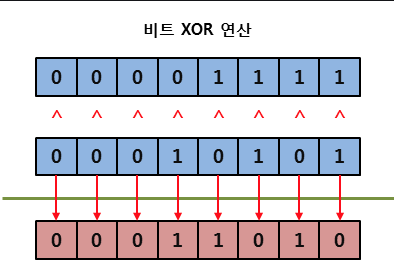

# OCT. 14. 2021
All nodes Distance K in Binary Tree 

https://leetcode.com/problems/all-nodes-distance-k-in-binary-tree/


In [ ]:
# Joe's Code
# Time O(N), Space O(N)

from collections import deque

class Solution:
    def distanceK(self, root: TreeNode, target: TreeNode, k: int) -> List[int]:
        def parents(node, pa):
            if not node:
                return
            
            node.parent = pa
            
            parents(node.left, node)
            parents(node.right, node)
        
        
        parents(root, None)
        
        q = deque()
        q.append((target, 0))
        visited = set()
        res = []
        
        while q:
            node, dis = q.popleft()
            if not node:
                continue
            visited.add(node)
            if dis == k:
                res.append(node.val)
                continue
            for n in (node.left, node.right, node.parent):
                if n not in visited:
                    q.append((n, dis+1))
        return res

In [ ]:
#Minsu;s Code

from queue import Queue
    
class Solution:
    def distanceK(self, root: TreeNode, target: TreeNode, k: int) -> List[int]:
        res = list()
        parents = dict()
        checked = set()
        def setParents(root: TreeNode, parent: TreeNode): # Put root's parent node in the map to connect the child node and the parent node
            if root :
                parents[root]= parent 
                setParents(root.left, root)
                setParents(root.right, root)
        
        setParents(root,None)
        
        queue = Queue();
        queue.put(root)
        while queue:
            got = queue.get();
            if got == target: # Find target node to count distance
                break
            if got.left : 
                queue.put(got.left)
            if got.right : 
                queue.put(got.right)
        
        def dfs(root: TreeNode, target: TreeNode, dis: int, k: int): #Find left, right and parent node and the distance is k, add the val in List
            if root == None or dis > k or (root.val in checked):
                return None
            if k == dis:
                res.append(root.val)
                return None
            
            checked.add(root.val)
            dfs(root.left, target, dis+1, k)
            dfs(root.right, target, dis+1, k)
            dfs(parents.get(root), target, dis+1, k)
        
        dfs(got, target, 0, k)
        return res

In [ ]:
# Leo's Code 
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

from collections import defaultdict,deque

class Solution:
    def distanceK(self, root: TreeNode, target: TreeNode, k: int) -> List[int]:
        #degree_dict = defaultdict(list)
        graph_table = defaultdict(list)
        
        def traverse_tree(node, parent):
            if not node:
                return 
            
            if parent:
                graph_table[node.val].append(parent.val)
                
            if node.left:
                graph_table[node.val].append(node.left.val)
                traverse_tree(node.left, node)
                
            if node.right:
                graph_table[node.val].append(node.right.val)
                traverse_tree(node.right, node)
                
        
        visited = set() 
        q = deque()
        result = [] 
        
        traverse_tree(root, None)
        
        #BFS
        q.append((target.val, 0))
        while q:
            curr_node, dist = q.popleft()
            if curr_node in visited:
                continue
                
            visited.add(curr_node)
            
            if k == dist:
                result.append(curr_node)
            
            elif dist < k:
                for next_node in graph_table[curr_node]:
                    q.append((next_node, dist + 1))
                    
        #print(graph_table)                    
        return result


In [ ]:
# Mins' code : Leet code solution, but can't get it now. 

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    #def distanceK(self, root: TreeNode, target: TreeNode, k: int) -> List[int]:
    def distanceK(self, root, target, K):
        def dfs(node, par = None):
            if node:
                node.par = par
                dfs(node.left, node)
                dfs(node.right, node)

        dfs(root)

        queue = collections.deque([(target, 0)])
        seen = {target}
        while queue:
            if queue[0][1] == K:
                return [node.val for node, d in queue]
            node, d = queue.popleft()
            for nei in (node.left, node.right, node.par):
                if nei and nei not in seen:
                    seen.add(nei)
                    queue.append((nei, d+1))

        return []

# OCT. 15. 2021
https://leetcode.com/problems/course-schedule-ii/
210. Course Schedule II



In [ ]:
# Joe's Code

from collections import defaultdict, deque

class Course:
    def __init__(self, val):
        self.val = val
        self._in = 0
        self.out = []


class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
        graph = defaultdict(Course)
        
        for i in range(numCourses):
            graph[i] = Course(i)
        
        for pre, course in prerequisites:
            graph[course].out.append(pre)
            graph[pre]._in += 1

        zero_in = deque()
        
        for key, obj in graph.items():
            if obj._in == 0:
                zero_in.append(obj)
        
        res = []

        while zero_in:
            course = zero_in.popleft()
            res.append(course.val)

            for c in course.out:
                next_course = graph[c]
                next_course._in -= 1
                if next_course._in == 0:
                    zero_in.append(next_course)
        
        return res if len(res) == numCourses else []

In [ ]:
# Mins' code
## 아주 중요한 문제!! 

from typing import List

class Solution:
    def findOrder(self, numCourses, prerequisites): 

        # building adjacency list of prereqs 
        # mapping crd and prerequistes
        prereq = {c:[] for c in range(numCourses)}
        for crs, pre in prerequisites:
            prereq[crs].append(pre)
        
        # 3 states of a course: visited (no-outgoing edges: add to output) / visiting (not added to cycle) / unvisited (not added to output or cycle)
        output = []
        visit, cycle = set(), set()
        def dfs(crs):
          if crs in cycle:
            return False
          if crs in visit:
            return True

          cycle.add(crs)
          for pre in prereq[crs]:
            if dfs(pre) == False:
              return False
          cycle.remove(crs)
          visit.add(crs)
          output.append(crs)
          return True

        for c in range(numCourses):
          if dfs(c) == False:
            return []
        return output

# 예제 검증
numCourses = 4
prerequisites = [[1,0],[2,0],[3,1],[3,2]]
slu = Solution()
slu.findOrder(numCourses, prerequisites)

# Input: numCourses = 4, prerequisites = [[1,0],[2,0],[3,1],[3,2]]

[0, 1, 2, 3]

# OCT. 18. 2021
https://leetcode.com/problems/top-k-frequent-elements/
347. Top K Frequent Elements


In [ ]:
# Joe's Code
# Time O(NlongN), Space: O(N)
from collections import defaultdict

class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        d = defaultdict(int)
        
        for n in nums:
            d[n] += 1
        
        array = [(k, v) for k, v in d.items()]
        array.sort(key=lambda x: x[1], reverse=True)
        return [array[i][0] for i in range(k)]

In [ ]:
# Minsu's Code
from queue import PriorityQueue
from collections import defaultdict

class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        res = list()
        numCount = defaultdict(int)
        pq = PriorityQueue()
        
        for num in nums:
            numCount[num] += 1
            
        for num, count in numCount.items():
            pq.put((-count, num))
        
        i=0
        while i<k:
            res.append(pq.get()[1])
            i += 1
        
        return res

In [ ]:
# Leo's code 
# Time O (N log N ), space : N 

import heapq 
from collections import defaultdict

class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        ans = []
        temp = [] 
        
        freq = defaultdict(int)
        for n in nums:
            freq[n] += 1
        
        
        for key,val in freq.items():
            heapq.heappush( temp,  (-val, key ) )
        
        # log N heapq is binary heap with logn push and log n pop 
        #heapq.heapify(nums)
        
        for i in range(k):
            ans.append(heapq.heappop(temp)[1])
            
        return ans
        

In [ ]:
# Mins' code

from typing import List

class Solution:
  def topFrequent(self, num: List[int], k: int) -> List[int]:
    count = {}
    freq = [[] for i in range(len(num) + 1)]

    for n in nums:
      count[n] = 1 + count.get(n, 0)
    for n, c in count.items():
      freq[c].append(n)

    res = []
    # print(freq)
    for i in range(len(freq) -1, 0, -1):
      for n in freq[i]:
        res.append(n)
        if len(res) == k:
          return res

nums = [1,1,1,2,2,2]
k = 2
slu = Solution()
slu.topFrequent(nums,k)

[[], [], [], [1, 2], [], [], []]


[1, 2]

#OCT. 19. 2021

https://leetcode.com/problems/the-maze/

###490. The Maze
###### Medium

There is a ball in a maze with empty spaces (represented as 0) and walls (represented as 1). The ball can go through the empty spaces by rolling up, down, left or right, but it won't stop rolling until hitting a wall. When the ball stops, it could choose the next direction.

Given the m x n maze, the ball's start position and the destination, where start = [startrow, startcol] and destination = [destinationrow, destinationcol], return true if the ball can stop at the destination, otherwise return false.

You may assume that the borders of the maze are all walls (see examples).

 

**Example 1:**
>![이미지](https://assets.leetcode.com/uploads/2021/03/31/maze1-1-grid.jpg)
>**Input:** maze = [[0,0,1,0,0],[0,0,0,0,0],[0,0,0,1,0],[1,1,0,1,1],[0,0,0,0,0]], start = [0,4], destination = [4,4]
>
>**Output:** true
>
>**Explanation:** One possible way is : left -> down -> left -> down -> right -> down -> right.

**Example 2:**
>![이미지](https://assets.leetcode.com/uploads/2021/03/31/maze1-2-grid.jpg)
>
>**Input:** maze = [[0,0,1,0,0],[0,0,0,0,0],[0,0,0,1,0],[1,1,0,1,1],[0,0,0,0,0]], start = [0,4], destination = [3,2]
>
>**Output:** false
>
>**Explanation:** There is no way for the ball to stop at the destination. Notice that you can pass through the destination but you cannot stop there.

**Example 3:**

>**Input:** maze = [[0,0,0,0,0],[1,1,0,0,1],[0,0,0,0,0],[0,1,0,0,1],[0,1,0,0,0]], start = [4,3], destination = [0,1]
>
>**Output:** false
>

**Constraints:**
>* m == maze.length
>* n == maze[i].length
>* 1 <= m, n <= 100
>* maze[i][j] is 0 or 1.
>* start.length == 2
>* destination.length == 2
>* 0 <= startrow, destinationrow <= m
>* 0 <= startcol, destinationcol <= n
>* Both the ball and the destination exist in an empty space, and they will not be in the same position initially.
The maze contains at least 2 empty spaces.


In [ ]:
#Minsu's code

class Solution:
    def hasPath(self, maze: List[List[int]], start: List[int], destination: List[int]) -> bool:
        rows = len(maze)
        cols = len(maze[0])
        visited = {}
        directions = ((0,1),(0,-1),(1,0),(-1,0))
        
        def dfs(start, visited):
            if visited.get((start[0],start[1])):
                return False
            if start == destination:
                return True
            
            visited[(start[0],start[1])] = True
            for direction in directions:
                dx = start[0]
                dy = start[1]
                while dx + direction[0] >= 0 and dx + direction[0] < rows and dy + direction[1] >= 0 and dy + direction[1] < cols and maze[dx+direction[0]][dy+direction[1]] !=1:
                        dx, dy = dx + direction[0], dy + direction[1]
                if dfs([dx, dy], visited):
                    return True
            return False
        
        return dfs(start, visited)

In [ ]:
from collections import deque

class Solution:
    def hasPath(self, maze, start, destination):
        dx = [ 0 , 0 , 1 , -1]
        dy = [ 1, -1 , 0 , 0 ]

        if start == destination:
            return True
        visited = set()
        q = deque()
        q.append( ( start[0], start[1] ) )
        visited.add(( start[0], start[1] ) )

        while q:
            x,y = q.popleft()
            if x == destination[0] and y == destination[1]:
                return True

            for k in range(4):
                nx, ny  = x + dx[k], y + dy[k]
                while 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] != 1:
                    nx += dx[k]
                    ny += dy[k]

                nx -= dx[k]
                ny -= dy[k]

                if ( (nx,ny) not in visited ):
                    visited.add((nx,ny))
                    q.append((nx,ny))
        return False


sol1 = Solution()
print(sol1.hasPath( [ [0,0,1,0,0],[0,0,0,0,0],[0,0,0,1,0],[1,1,0,1,1],[0,0,0,0,0] ], (0,4), (4,4) ))
print(sol1.hasPath( [ [0,0,1,0,0],[0,0,0,0,0],[0,0,0,1,0],[1,1,0,1,1],[0,0,0,0,0] ], (0,4), (3,2) ))
print(sol1.hasPath( [[0,0,0,0,0],[1,1,0,0,1],[0,0,0,0,0],[0,1,0,0,1],[0,1,0,0,0]], (4,3), (0,1) ))





False
True
False


In [ ]:
#  Mins': 아래 유튭코드 
# https://www.youtube.com/watch?v=mjDfgdGp-II&t=201s

from typing import List

maze = [[0,0,1,0,0],[0,0,0,0,0],[0,0,0,1,0],[1,1,0,1,1],[0,0,0,0,0]]
start = [0,4]
destination = [4,4]

class Solution:
    def hasPath(self, maze:List[List[int]], start: List[int], destination: List[int]) -> bool: 
        m, n, visited = len(maze), len(maze[0]), set()
        def dfs(x, y):
            if (x,y) not in visited:
                visited.add((x,y))
            else:
                return False
            if [x,y] == destination:
                return True
            for i, j in (0, -1), (0, 1), (-1, 0), (1, 0):
                new_X, new_Y = x, y
                while 0 <= new_X + i < m and 0 <= new_Y + j < n and maze[new_X + i][new_Y +j] != 1:
                    new_X += i
                    new_Y += j
                if dfs(new_X, new_Y):
                    return True
            return False
        return(dfs(*start))


slu = Solution()
slu.hasPath(maze, start, destination)

True

In [ ]:
# Joe's Code

# https://leetcode.com/problems/the-maze/

from collections import deque


def find_maze(maze, start, destination):
    q = deque([start])
    visited = set()
    while q:
        cur_row, cur_col = q.popleft()
        visited.add((cur_row, cur_col))
        if cur_row == destination[0] and cur_col == destination[1]:
            return True
        for d in ((-1, 0), (0, -1), (1, 0), (0, 1)):
            nr, nc = cur_row+d[0], cur_col+d[1]
            while 0 <= nr < len(maze) and 0 <= nc < len(maze[0]) and maze[nr][nc] != 1:
                nr += d[0]
                nc += d[1]
            nr -= d[0]
            nc -= d[1]
            if (nr, nc) not in visited:
                q.append((nr, nc))
    return False


if __name__ == '__main__':
    maze = [[0, 0, 1, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 1, 0], [1, 1, 0, 1, 1], [0, 0, 0, 0, 0]]
    start = [0, 4]
    destination = [4, 4]
    assert find_maze(maze, start, destination)
    maze = [[0, 0, 1, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 1, 0], [1, 1, 0, 1, 1], [0, 0, 0, 0, 0]]
    start = [0, 4]
    destination = [3, 2]
    assert not find_maze(maze, start, destination)
    maze = [[0, 0, 0, 0, 0], [1, 1, 0, 0, 1], [0, 0, 0, 0, 0], [0, 1, 0, 0, 1], [0, 1, 0, 0, 0]]
    start = [4, 3]
    destination = [0, 1]
    assert not find_maze(maze, start, destination)


# OCT. 20. 2021

LeetCode #121 

https://leetcode.com/problems/best-time-to-buy-and-sell-stock/


시간 되시는 분은 Advanced version 도 :) #122
https://leetcode.com/problems/best-time-to-buy-and-sell-stock-ii/



In [ ]:
#Minsu's code 
#122 Time O(N), Space O(1)
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        sumProfit = 0
        
        for i in range(1, len(prices)):
            sumProfit = sumProfit + max(0,prices[i]-prices[i-1]) # Cumulative Sum the gap with i - 1 based on i (exclude nagative number)
        
        return sumProfit

#121 Time O(N), Space O(1)
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        l, r = 0, 1
        maxProf = 0
        while r<len(prices):
            if prices[l]<prices[r]:
                maxProf = max(maxProf,prices[r]-prices[l])
            else:
                l = r 
            r += 1
        
        return maxProf

In [ ]:
# Joe's code
# Time O(N), Space O(1)
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        lowest = float('inf')
        res = 0
        
        for price in prices:
            res = max(res, price-lowest)
            lowest = min(lowest, price)
        return res

# Time O(N), Space O(1)
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        if not prices:
            return 0
        res = 0
        for i, p in enumerate(prices):
            if i == 0:
                continue
            if p > prices[i-1]:
                res += (p - prices[i-1])
        return res



# OCT. 21. 2021
https://leetcode.com/problems/path-with-minimum-effort/
1631. Path With Minimum Effort

In [ ]:
# Leo's code 
from collections import deque

from typing import List

class Solution:
    def minimumEffortPath(self, heights: List[List[int]]) -> int:
        # 시작점을 기준으로 BFS를 하는데
        dx = [1, -1, 0, 0]
        dy = [0, 0, 1, -1]
        # result = []

        start = (0, 0)
        goal = (len(heights), len(heights[0]))

        def can_reach_to_the_dest(mid):
            visited = set()
            q = deque()
            q.append(start)

            while q:
                curr = q.popleft()
                if curr == (goal[0]-1, goal[1]-1):
                    return True
                visited.add(curr)

                for k in range(4):
                    nx, ny = curr[0] + dx[k], curr[1] + dy[k]

                    if 0 <= nx < goal[0] and 0 <= ny < goal[1] and (nx, ny) not in visited:
                        effort_needed = abs(heights[nx][ny] - heights[curr[0]][curr[1]])

                        if effort_needed <= mid:
                            visited.add((nx, ny))
                            q.append((nx, ny))

            return False

        left, right = 0, 10 ** 6
        while left < right:
            mid = left + ((right - left) // 2)
            # 해당 path 로 BFS
            if can_reach_to_the_dest(mid):
                right = mid
            else:
                left = mid + 1

        return left


sol1 =  Solution()
print(sol1.minimumEffortPath([[1,2,2],[3,8,2],[5,3,5]] ))

In [ ]:
#Minsu's code 
#Priority Queue + BFS
#p.s Backtracking method is TLE.

from queue import PriorityQueue

class Solution:
    def minimumEffortPath(self, heights: List[List[int]]) -> int:
        rows, cols = len(heights), len(heights[0])
        visited=set()
        pq = PriorityQueue()
        
        pq.put((0,0,0)) #to find the Minimum effort value, this Priority Queue reference value is the effort value. and coordinate? 좌표....ㅜ
        
        directions = ((0,1),(0,-1),(1,0),(-1,0))
        """
        If I use Priority Queue, I can use dfs or bfs to find values. (Refer to the Maze problem(19, Oct, 2021)) : I? You?
        """
        while pq:
            got = pq.get()
            effort = got[0]
            if got[1] == rows-1 and got[2] == cols-1:
                break
            visited.add((got[1],got[2]))
            
            for direction in directions:
                dx, dy = got[1] + direction[0], got[2] + direction[1]
                if dx < rows and dx >=0 and dy >= 0 and dy < cols and (dx, dy) not in visited:
                    eff = max(effort, abs(heights[dx][dy] - heights[got[1]][got[2]]))
                    pq.put((eff,dx,dy))
            
        return effort